In [16]:
import cv2
import os
import hashlib

# 1. المسار الصحيح حيث توجد صورك الأصلية (تأكدي من هذا المسار)
raw_test_dir = '/content/my_test_images_folder/my_test_images'

# 2. مجلد المخرجات
output_dir = '/content/enhanced_test_images'
os.makedirs(output_dir, exist_ok=True)

# 3. دالة المعالجة مع التأكد من وجود الملفات
def process_and_save(input_path, save_path):
    files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"🔎 وجدنا {len(files)} صورة للمعالجة...")

    for filename in files:
        path = os.path.join(input_path, filename)
        img = cv2.imread(path)

        # تحسين الصورة (CLAHE)
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
        l, a, b = cv2.split(lab)
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        cl = clahe.apply(l)
        enhanced = cv2.cvtColor(cv2.merge((cl, a, b)), cv2.COLOR_Lab2BGR)

        # حفظ الصورة في المجلد الجديد
        cv2.imwrite(os.path.join(save_path, filename), enhanced)
        print(f"✅ تم حفظ وتحسين: {filename}")

# تشغيل العملية
process_and_save(raw_test_dir, output_dir)

🔎 وجدنا 30 صورة للمعالجة...
✅ تم حفظ وتحسين: ydlpktypbljsmstq.jpeg
✅ تم حفظ وتحسين: photo_17_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_8_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_16_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_3_2026-01-29_02-07-11.jpg
✅ تم حفظ وتحسين: 21.jpg
✅ تم حفظ وتحسين: photo_19_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_7_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_6_2026-01-29_02-07-11.jpg
✅ تم حفظ وتحسين: photo_12_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_9_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: 10-2-_jpg.rf.2a82d5720f30d4092831a7493b349f27.jpg
✅ تم حفظ وتحسين: photo_11_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_24_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_18_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_10_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_5_2026-01-29_02-07-11.jpg
✅ تم حفظ وتحسين: photo_25_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_13_2026-01-29_02-07-12.jpg
✅ تم حفظ وتحسين: photo_15_2026-01-29_02-07-12.jp

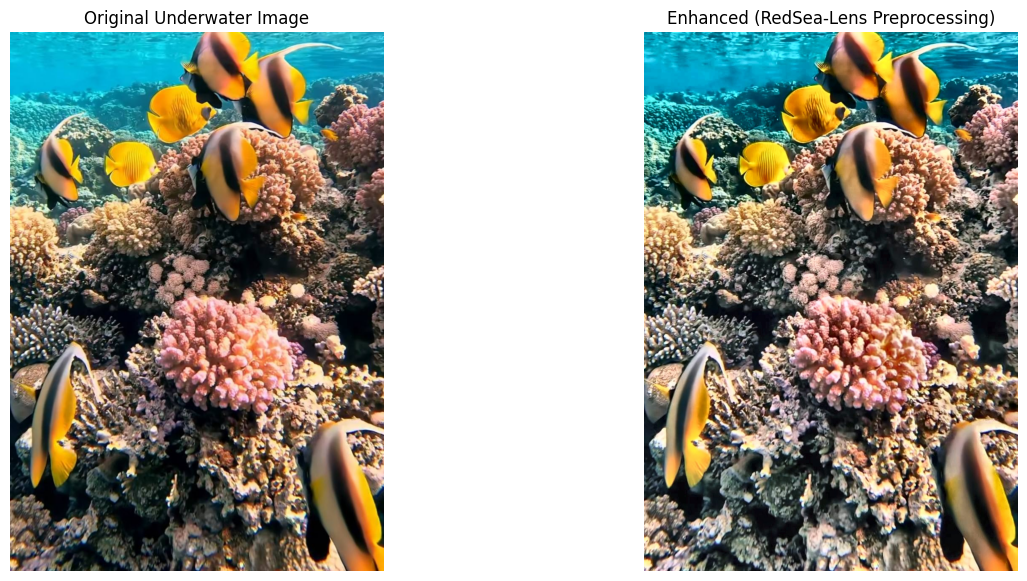

In [17]:
import matplotlib.pyplot as plt
import cv2

# اختر صورة عشوائية من المجلدات
test_img_name = os.listdir(output_dir)[8]
original_path = os.path.join(raw_test_dir, test_img_name)
enhanced_path = os.path.join(output_dir, test_img_name)

# القراءة والعرض
img_orig = cv2.cvtColor(cv2.imread(original_path), cv2.COLOR_BGR2RGB)
img_enh = cv2.cvtColor(cv2.imread(enhanced_path), cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(img_orig)
axes[0].set_title("Original Underwater Image")
axes[0].axis('off')

axes[1].imshow(img_enh)
axes[1].set_title("Enhanced (RedSea-Lens Preprocessing)")
axes[1].axis('off')

plt.show()

In [9]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="1cR10H7ucqLeQEzemBkV")
project = rf.workspace("ai-idj2q").project("coral-reef-health-identifier-kytm1")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [18]:
import cv2
import os

# 1. تحديد مسار بيانات التدريب الأصلية (تأكدي من المسار في الملف الجديد)
train_images_path = '/content/Coral-Reef-Health-Identifier-1/train/images'
# 2. إنشاء مجلد جديد للصور المحسنة
enhanced_train_path = '/content/Coral-Reef-Health-Identifier-1/train/images_enhanced'
os.makedirs(enhanced_train_path, exist_ok=True)

def enhance_batch(input_path, output_path):
    files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"🚀 بدء معالجة {len(files)} صورة من بيانات التدريب...")

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

    for count, filename in enumerate(files):
        img = cv2.imread(os.path.join(input_path, filename))
        if img is not None:
            # تطبيق التحسين
            lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
            l, a, b = cv2.split(lab)
            cl = clahe.apply(l)
            enhanced = cv2.cvtColor(cv2.merge((cl, a, b)), cv2.COLOR_Lab2BGR)

            # حفظ في المجلد الجديد
            cv2.imwrite(os.path.join(output_path, filename), enhanced)

        # طباعة التقدّم كل 500 صورة
        if count % 500 == 0:
            print(f"✅ تم معالجة {count} صورة...")

    print(f"✨ اكتمل التحسين! جميع صور التدريب موجودة الآن في: {output_path}")

# تشغيل العملية
enhance_batch(train_images_path, enhanced_train_path)

🚀 بدء معالجة 4125 صورة من بيانات التدريب...
✅ تم معالجة 0 صورة...
✅ تم معالجة 500 صورة...
✅ تم معالجة 1000 صورة...
✅ تم معالجة 1500 صورة...
✅ تم معالجة 2000 صورة...
✅ تم معالجة 2500 صورة...
✅ تم معالجة 3000 صورة...
✅ تم معالجة 3500 صورة...
✅ تم معالجة 4000 صورة...
✨ اكتمل التحسين! جميع صور التدريب موجودة الآن في: /content/Coral-Reef-Health-Identifier-1/train/images_enhanced


In [19]:
import hashlib
import os

def get_image_hash(image_path):
    """حساب بصمة MD5 لملف الصورة"""
    with open(image_path, "rb") as f:
        file_hash = hashlib.md5()
        while chunk := f.read(8192):
            file_hash.update(chunk)
    return file_hash.hexdigest()

# 1. أرشفة بصمات صور التدريب (قاعدة البيانات الأصلية)
train_dir = '/content/Coral-Reef-Health-Identifier-1/train/images_enhanced'
train_hashes = set()

print("🔍 جارِ فحص صور التدريب وأرشفة البصمات...")
for filename in os.listdir(train_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(train_dir, filename)
        train_hashes.add(get_image_hash(path))
print(f"✅ تمت أرشفة {len(train_hashes)} بصمة فريدة من بيانات التدريب.\n")

# 2. مقارنة الصور المحسنة الجديدة بصور التدريب
enhanced_test_dir = '/content/enhanced_test_images'
duplicates = 0
unique_images = 0

print("🧪 جارِ فحص صور الاختبار الجديدة للتحقق من النزاهة...")
for filename in os.listdir(enhanced_test_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(enhanced_test_dir, filename)
        current_hash = get_image_hash(path)

        if current_hash in train_hashes:
            print(f"❌ تكرار: الصورة '{filename}' موجودة في التدريب (Data Leakage!)")
            duplicates += 1
        else:
            # الاختياري: يمكنك طباعة التأكيد لكل صورة أو الاكتفاء بالملخص
            unique_images += 1

print(f"\n--- النتيجة النهائية ---")
print(f"✨ صور جديدة تماماً: {unique_images}")
print(f"⚠️ صور مكررة تم كشفها: {duplicates}")

🔍 جارِ فحص صور التدريب وأرشفة البصمات...
✅ تمت أرشفة 4055 بصمة فريدة من بيانات التدريب.

🧪 جارِ فحص صور الاختبار الجديدة للتحقق من النزاهة...
❌ تكرار: الصورة '10-2-_jpg.rf.2a82d5720f30d4092831a7493b349f27.jpg' موجودة في التدريب (Data Leakage!)

--- النتيجة النهائية ---
✨ صور جديدة تماماً: 29
⚠️ صور مكررة تم كشفها: 1


In [20]:
import shutil

# ضغط المجلد المحسن
shutil.make_archive('Coral_Enhanced_Test_Set', 'zip', '/content/enhanced_test_images')

print("✅ تم إنشاء ملف الـ Zip بنجاح! يمكنكِ الآن تحميله من قائمة الملفات اليسرى.")

✅ تم إنشاء ملف الـ Zip بنجاح! يمكنكِ الآن تحميله من قائمة الملفات اليسرى.
